In [14]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [15]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [17]:
print("✅ Data loaded and preprocessed")

✅ Data loaded and preprocessed


In [18]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes (digits 0–9)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("✅ Model built successfully")


✅ Model built successfully


In [19]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.7368 - loss: 0.7867 - val_accuracy: 0.8866 - val_loss: 0.3516
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9131 - loss: 0.2850 - val_accuracy: 0.9305 - val_loss: 0.2292
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9390 - loss: 0.1992 - val_accuracy: 0.9509 - val_loss: 0.1583
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9540 - loss: 0.1487 - val_accuracy: 0.9664 - val_loss: 0.1150
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9641 - loss: 0.1159 - val_accuracy: 0.9716 - val_loss: 0.0922


In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test accuracy: {test_acc:.4f}")

313/313 - 2s - 6ms/step - accuracy: 0.9716 - loss: 0.0922

✅ Test accuracy: 0.9716


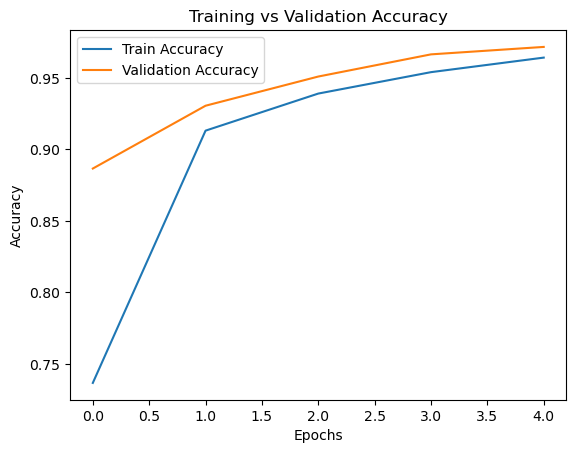

In [21]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


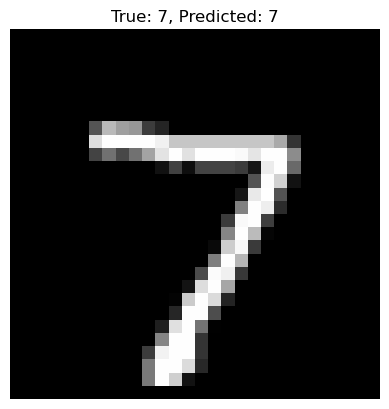

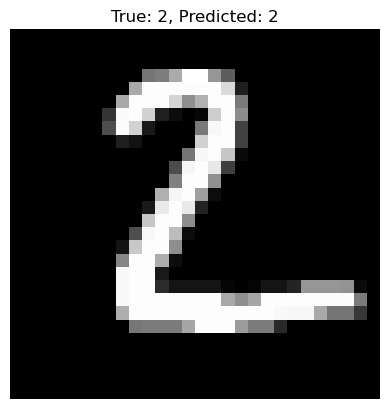

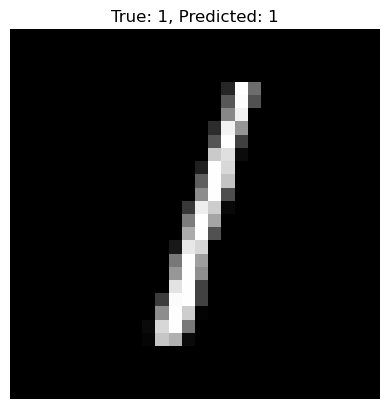

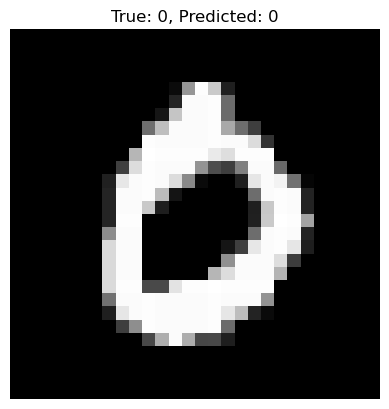

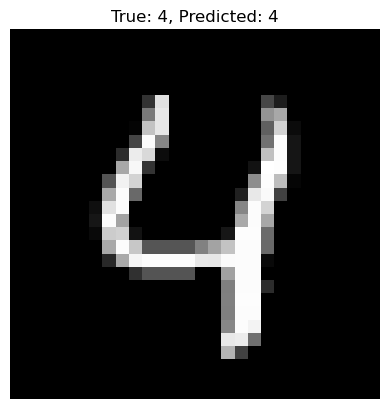

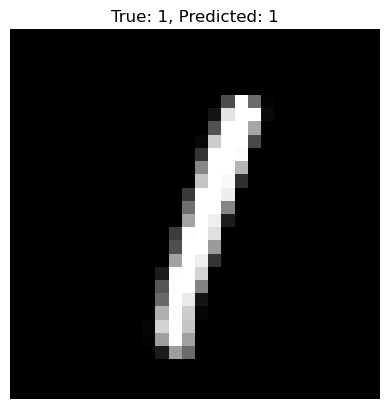

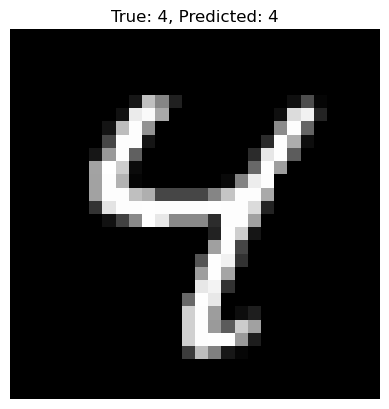

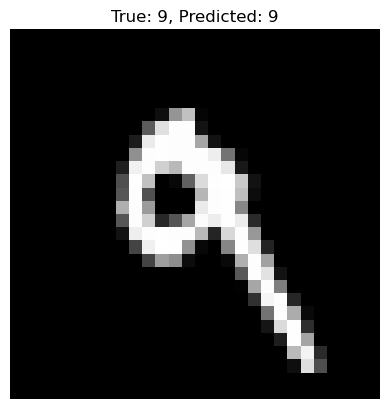

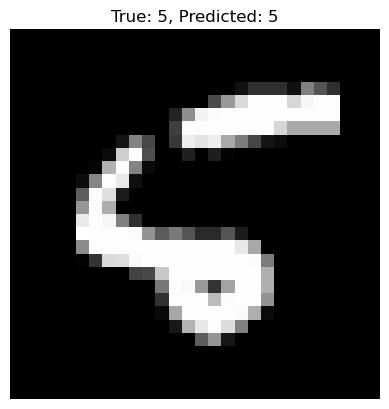

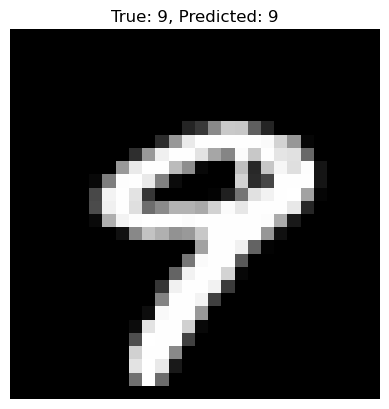

In [12]:
predictions = model.predict(x_test[:10])
for i in range(10):
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"True: {y_test[i]}, Predicted: {np.argmax(predictions[i])}")
    plt.axis("off")
    plt.show()

